In [76]:
import requests
from bs4 import BeautifulSoup
import reverse_geocode
import folium
from geopy.geocoders import Nominatim
import numpy as np
import matplotlib as mpl
import pandas as pd
from sklearn import datasets
import geocoder
from geopy.exc import GeocoderTimedOut
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

In [3]:
Raleigh_Neighborhoods=[]
response_obj=requests.get('https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Raleigh,_North_Carolina').text
soup=BeautifulSoup(response_obj,'lxml')
mydivs = soup.findAll("div", {"class": "mw-category-group"})
for div in mydivs:
    for l in div.findAll('a'):
        for title in l:
            Raleigh_Neighborhoods.append(title)
Raleigh_Neighborhoods.remove('Raleigh, North Carolina neighborhoods')
Raleigh_Neighborhoods=[s.replace('Historic District','') for s in Raleigh_Neighborhoods]
Raleigh_Neighborhoods=[s.replace('(North Carolina)','') for s in Raleigh_Neighborhoods]
Raleigh_Neighborhoods=[s.replace('(Raleigh, North Carolina)','') for s in Raleigh_Neighborhoods]
Raleigh_Neighborhoods=[s.strip(' ') for s in Raleigh_Neighborhoods]
Raleigh_Neighborhoods=[s+(',Raleigh, North Carolina') for s in Raleigh_Neighborhoods]
Raleigh_Neighborhoods

['Battery Heights,Raleigh, North Carolina',
 'Bloomsbury,Raleigh, North Carolina',
 'Boylan Heights,Raleigh, North Carolina',
 'Cameron Park,Raleigh, North Carolina',
 'Cameron Village,Raleigh, North Carolina',
 'Cameron Village,Raleigh, North Carolina',
 'Capitol Area,Raleigh, North Carolina',
 'Capitol Heights,Raleigh, North Carolina',
 'Centennial Campus of North Carolina State University,Raleigh, North Carolina',
 'Depot,Raleigh, North Carolina',
 'East Raleigh–South Park,Raleigh, North Carolina',
 'Fayetteville Street (Raleigh),Raleigh, North Carolina',
 'Fayetteville Street,Raleigh, North Carolina',
 'Five Points Historic Neighborhoods,Raleigh, North Carolina',
 'Glenwood Avenue,Raleigh, North Carolina',
 'Glenwood–Brooklyn,Raleigh, North Carolina',
 'Hayes Barton,Raleigh, North Carolina',
 'Hi-Mount,Raleigh, North Carolina',
 'Historic Oakwood,Raleigh, North Carolina',
 'Longview Gardens,Raleigh, North Carolina',
 'Madonna Acres,Raleigh, North Carolina',
 'Maiden Lane,Raleigh, N

In [4]:
df_ral=pd.DataFrame(Raleigh_Neighborhoods)
df_ral=df_ral.rename(columns={0:'Neighborhoods'})
df_ral=df_ral.drop_duplicates(keep='first')
df_ral

,Neighborhoods
0,"Battery Heights,Raleigh, North Carolina"
1,"Bloomsbury,Raleigh, North Carolina"
2,"Boylan Heights,Raleigh, North Carolina"
3,"Cameron Park,Raleigh, North Carolina"
4,"Cameron Village,Raleigh, North Carolina"
6,"Capitol Area,Raleigh, North Carolina"
7,"Capitol Heights,Raleigh, North Carolina"
8,Centennial Campus of North Carolina State Univ...
9,"Depot,Raleigh, North Carolina"
10,"East Raleigh–South Park,Raleigh, North Carolina"


In [5]:
geolocator=Nominatim(user_agent='Raleigh')
city=[]
lat=[]
long=[]
try:
    for i in Raleigh_Neighborhoods:
        location = geolocator.geocode(i)
        if location is not None:
            city.append(i)
            lat.append(location.latitude)
            long.append(location.longitude)
except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s"%(location, e.msg))

In [6]:
df=pd.DataFrame({'Neighborhoods':city,'latitude':lat,'longitude':long})

In [7]:
df=df.drop_duplicates(subset='latitude',keep='first')

In [8]:
df

,Neighborhoods,latitude,longitude
0,"Battery Heights,Raleigh, North Carolina",35.777058,-78.617563
1,"Bloomsbury,Raleigh, North Carolina",35.808897,-78.648599
2,"Boylan Heights,Raleigh, North Carolina",35.774159,-78.652102
3,"Cameron Park,Raleigh, North Carolina",35.785779,-78.655470
4,"Cameron Village,Raleigh, North Carolina",35.790361,-78.660413
6,"Capitol Area,Raleigh, North Carolina",35.789884,-78.621851
8,"Depot,Raleigh, North Carolina",35.780398,-78.639099
9,"Fayetteville Street (Raleigh),Raleigh, North C...",35.768875,-78.641336
11,"Glenwood Avenue,Raleigh, North Carolina",35.886724,-78.744499
12,"Hayes Barton,Raleigh, North Carolina",35.802755,-78.646583


In [9]:
raleigh=['North Raleigh,Raleigh,nc','Southwest raleigh,Raleigh,nc','Southeast raleigh,Raleigh,nc'
        ,'east raleigh,Raleigh,nc']

In [10]:
raliegh_side=[]
lat=[]
long=[]
try:
    for i in raleigh:
        location = geolocator.geocode(i)
        if location is not None:
            raliegh_side.append(i)
            lat.append(location.latitude)
            long.append(location.longitude)
except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s"%(location, e.msg))

In [11]:
df_ral=pd.DataFrame({'Raleigh_Side':raliegh_side,'latitude':lat,'longitude':long})
df_ral

,Raleigh_Side,latitude,longitude
0,"North Raleigh,Raleigh,nc",35.908068,-78.600658
1,"Southwest raleigh,Raleigh,nc",35.773076,-78.702732
2,"Southeast raleigh,Raleigh,nc",35.768612,-78.596097
3,"east raleigh,Raleigh,nc",37.756782,-81.174266


In [12]:
CLIENT_ID = 'EA0WZQZP3HJVT4DTV02NLEGNIFSAHPTRXK50TAZIIYY5A5OG' # your Foursquare ID
CLIENT_SECRET = '5X1OY3KPXNEM1F5CVU2A124DQUNH3GC0TDP1MP1M0FX31D1Z' # your Foursquare Secret

# CLIENT_ID ='BCZ1DKRCRZTMRZPSY5HHEQTQJNZCITUWFO3CLRCIUQOOGSFB'
# CLIENT_SECRET ='WPWOCZ3QZVXYQCXPKBPKSKW1CQSFBLTKAWYGSS0WBXJKZZZW'
VERSION = '20190104'
LIMIT = 150
radius= 5000
latitude = 35.787743
longitude = -78.644257
search_query='Restaurants'
restID=[]
restName=[]
restCity=[]
restLat=[]
restLng=[]
restCat=[]

In [15]:
# url1 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude,longitude,VERSION,search_query,radius,LIMIT)
# results = requests.get(url1).json()
# r=results['response']['groups'][0]['items']
# for a in range(len(r)):
#      print(r[a]['venue']['name'],r[a]['venue']['name'])

In [16]:
# for lat ,lng in zip(df_ral['latitude'],df_ral['longitude']):  
#     url1 = 'https://api.foursquare.com/v2/venues/timeseries?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, lat,lng, VERSION)
#     results = requests.get(url1).json()
#     print(results)

In [17]:
restCity_Lat=[]
restCity_Lng=[]
restName_Ral=[]
restCity_Ral=[]
restLat_Ral=[]
restLng_Ral=[]
restCat_Ral=[]
for neigh,lat ,lng in zip(df_ral['Raleigh_Side'],df_ral['latitude'],df_ral['longitude']):  
    url1 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat,lng,VERSION,search_query,radius,LIMIT)
    results = requests.get(url1).json()
    r=results['response']['groups'][0]['items']
    for a in range(len(r)):   
        restCity_Ral.append(neigh)
        restCity_Lat.append(lat)
        restCity_Lng.append(lng)
        restName_Ral.append(r[a]['venue']['name'])
        restCat_Ral.append(r[a]['venue']['categories'][0]['name'])
        restLat_Ral.append(r[a]['venue']['location']['lat'])
        restLng_Ral.append(r[a]['venue']['location']['lng'])

#print(neigh,r[a]['venue']['name'],r[a]['venue']['categories'][0]['name'],r[a]['venue']['location']['lat'],r[a]['venue']['location']['lng'])

In [18]:
final_Ral=pd.DataFrame(list(zip(restCity_Ral,restCity_Lat,restCity_Lng,restName_Ral,restCat_Ral,restLat_Ral,restLng_Ral)),columns=['Neighbourhood','Neigh_Lat','Neigh_Lng','Venue','Venue_Category','Latitude','Longitude'])
final_Ral

,Neighbourhood,Neigh_Lat,Neigh_Lng,Venue,Venue_Category,Latitude,Longitude
0,"North Raleigh,Raleigh,nc",35.908068,-78.600658,City Barbeque,BBQ Joint,35.901950,-78.602888
1,"North Raleigh,Raleigh,nc",35.908068,-78.600658,Bella Italia,Pizza Place,35.906059,-78.592818
2,"North Raleigh,Raleigh,nc",35.908068,-78.600658,Bad Daddy's Burger Bar,Burger Joint,35.901833,-78.603660
3,"North Raleigh,Raleigh,nc",35.908068,-78.600658,Bojangles' Famous Chicken 'n Biscuits,Restaurant,35.905882,-78.591228
4,"North Raleigh,Raleigh,nc",35.908068,-78.600658,Nashers,Sandwich Place,35.906080,-78.592399
5,"North Raleigh,Raleigh,nc",35.908068,-78.600658,Lemongrass Thai,Thai Restaurant,35.892621,-78.600049
6,"North Raleigh,Raleigh,nc",35.908068,-78.600658,Taza Grill,Mediterranean Restaurant,35.907616,-78.590018
7,"North Raleigh,Raleigh,nc",35.908068,-78.600658,Farina,Italian Restaurant,35.895048,-78.621906
8,"North Raleigh,Raleigh,nc",35.908068,-78.600658,NC Japan Express,Japanese Restaurant,35.905393,-78.600228
9,"North Raleigh,Raleigh,nc",35.908068,-78.600658,Fresh Levant Bistro,Mediterranean Restaurant,35.894986,-78.622054


In [20]:
final_Ral.groupby(['Venue_Category']).count()

,Neighbourhood,Neigh_Lat,Neigh_Lng,Venue,Latitude,Longitude
Venue_Category,,,,,,
American Restaurant,24,24,24,24,24,24
Arepa Restaurant,1,1,1,1,1,1
Asian Restaurant,9,9,9,9,9,9
BBQ Joint,8,8,8,8,8,8
Bagel Shop,5,5,5,5,5,5
Bakery,10,10,10,10,10,10
Breakfast Spot,9,9,9,9,9,9
Burger Joint,11,11,11,11,11,11
Burrito Place,2,2,2,2,2,2


In [57]:
# for neigh,lat ,lng in zip(df['Neighborhoods'],df['latitude'],df['longitude']):  
#     url1 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat,lng,VERSION,search_query,radius,LIMIT)
#     results = requests.get(url1).json()
#     r=results['response']['groups'][0]['items']
#     for a in range(len(r)):
#         restCity.append(neigh)
#         restName.append(r[a]['venue']['name'])
#         restCat.append(r[a]['venue']['categories'][0]['name'])
#         restLat.append(r[a]['venue']['location']['lat'])
#         restLng.append(r[a]['venue']['location']['lng'])        
#         #print(neigh,r[a]['venue']['name'],r[a]['venue']['categories'][0]['name'],r[a]['venue']['location']['lat'],r[a]['venue']['location']['lng'])
#         #print(r[a]['venue']['name'],r[a]['venue']['categories'][0]['name'],r[a]['venue'])
         

In [56]:
# final=pd.DataFrame(list(zip(restCity,restName,restCat,restLat,restLng)),columns=['Neighbourhood','Name','Category','Latitude','Longitude'])
# final.sort_values(by=['Name'])
# final.shape

In [24]:
ral_lat=35.787743
ral_long=-78.644257
map_restaurants=folium.Map(location=[ral_lat,ral_long],zoom_start=11,tiles="openstreetmap")

In [29]:
x=np.arange(len(raleigh))
rainbow=["#00ff00","#ff00ff","#0000ff","#ffa500","#ff0000"]
final_Ral.head(5)

,Neighbourhood,Neigh_Lat,Neigh_Lng,Venue,Venue_Category,Latitude,Longitude
0,"North Raleigh,Raleigh,nc",35.908068,-78.600658,City Barbeque,BBQ Joint,35.901950,-78.602888
1,"North Raleigh,Raleigh,nc",35.908068,-78.600658,Bella Italia,Pizza Place,35.906059,-78.592818
2,"North Raleigh,Raleigh,nc",35.908068,-78.600658,Bad Daddy's Burger Bar,Burger Joint,35.901833,-78.603660
3,"North Raleigh,Raleigh,nc",35.908068,-78.600658,Bojangles' Famous Chicken 'n Biscuits,Restaurant,35.905882,-78.591228
4,"North Raleigh,Raleigh,nc",35.908068,-78.600658,Nashers,Sandwich Place,35.906080,-78.592399


In [37]:
for lat,long,poi,distr in zip(final_Ral['Latitude'],final_Ral['Longitude'],
                              final_Ral['Venue_Category'],final_Ral['Neighbourhood']):
    label=folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat,long],
        radius = 7,
        popup=label,
        color=rainbow[raleigh.index(distr)-1],
        fill=True,
        fill_color=rainbow[raleigh.index(distr)-1],
        fill_opacity=0.3).add_to(map_restaurants)
    
map_restaurants

In [42]:
final_Ral_onehot=pd.get_dummies(final_Ral[['Venue_Category']],prefix="",prefix_sep="")
final_Ral_onehot['Neighbourhood']=final_Ral['Neighbourhood']
fixed_cols= [final_Ral_onehot.columns[-1]] + list(final_Ral_onehot.columns[:-1])
final_Ral_onehot=final_Ral_onehot[fixed_cols]

In [44]:
final_Ral_onehot_grouped=final_Ral_onehot.groupby('Neighbourhood').mean().reset_index()
final_Ral_onehot_grouped.index=np.arange(1,len(final_Ral_onehot_grouped)+1)
final_Ral_onehot_grouped

,Neighbourhood,American Restaurant,Arepa Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Breakfast Spot,Burger Joint,Burrito Place,...,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
1,"North Raleigh,Raleigh,nc",0.080000,0.000000,0.020000,0.030000,0.020000,0.020000,0.020000,0.030000,0.000000,...,0.000000,0.010000,0.030000,0.010000,0.000000,0.020000,0.010000,0.000000,0.010000,0.010000
2,"Southeast raleigh,Raleigh,nc",0.085106,0.000000,0.053191,0.031915,0.000000,0.053191,0.010638,0.042553,0.000000,...,0.042553,0.010638,0.053191,0.000000,0.010638,0.000000,0.010638,0.010638,0.000000,0.010638
3,"Southwest raleigh,Raleigh,nc",0.074468,0.010638,0.021277,0.010638,0.031915,0.031915,0.063830,0.031915,0.021277,...,0.031915,0.010638,0.042553,0.021277,0.000000,0.000000,0.000000,0.000000,0.010638,0.000000
4,"east raleigh,Raleigh,nc",0.020408,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.020408,0.000000,...,0.000000,0.000000,0.000000,0.020408,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000


In [51]:
top_ven=5
for places in final_Ral_onehot_grouped['Neighbourhood']:
    print("%%%%%"+places+"%%%%%")
    temp=final_Ral_onehot_grouped[final_Ral_onehot_grouped['Neighbourhood']==places].T.reset_index()
    temp.columns=['Venue','Freq']
    temp=temp.iloc[1:]
    temp['Freq']=temp['Freq'].astype(float)
    print(temp.sort_values('Freq',ascending=False).reset_index(drop=True).head(top_ven))
    print('\n')

%%%%%North Raleigh,Raleigh,nc%%%%%
                  Venue  Freq
0    Mexican Restaurant  0.10
1  Fast Food Restaurant  0.09
2        Sandwich Place  0.09
3   American Restaurant  0.08
4           Pizza Place  0.08


%%%%%Southeast raleigh,Raleigh,nc%%%%%
                 Venue      Freq
0  American Restaurant  0.085106
1   Italian Restaurant  0.063830
2     Asian Restaurant  0.053191
3               Bakery  0.053191
4   Mexican Restaurant  0.053191


%%%%%Southwest raleigh,Raleigh,nc%%%%%
                      Venue      Freq
0       American Restaurant  0.074468
1  Mediterranean Restaurant  0.074468
2      Fast Food Restaurant  0.063830
3            Breakfast Spot  0.063830
4          Sushi Restaurant  0.042553


%%%%%east raleigh,Raleigh,nc%%%%%
                  Venue      Freq
0            Restaurant  0.204082
1           Pizza Place  0.163265
2  Fast Food Restaurant  0.142857
3    Seafood Restaurant  0.061224
4    Mexican Restaurant  0.061224




In [55]:
kclusters=3
final_Ral_cluster=final_Ral_onehot_grouped.drop('Neighbourhood',1)
kmeans = KMeans(n_clusters=kclusters,random_state=0).fit(final_Ral_cluster)
print("Check the 5 cluster lables :", kmeans.labels_[0:5])

Check the 5 cluster lables : [0 2 2 1]


In [64]:
final_Ral['Venue_Category'].value_counts()

Fast Food Restaurant               27
American Restaurant                24
Mexican Restaurant                 22
Pizza Place                        21
Restaurant                         20
Sandwich Place                     16
Italian Restaurant                 15
Mediterranean Restaurant           14
Sushi Restaurant                   12
Burger Joint                       11
Bakery                             10
Café                                9
Asian Restaurant                    9
Breakfast Spot                      9
BBQ Joint                           8
Seafood Restaurant                  8
Chinese Restaurant                  7
Hot Dog Joint                       7
Southern / Soul Food Restaurant     7
Bagel Shop                          5
Food Truck                          5
Deli / Bodega                       5
Diner                               4
Taco Place                          4
Gastropub                           4
French Restaurant                   3
Donut Shop  

In [65]:
final_Ral_clusters_top10=final_Ral['Venue_Category'].value_counts()[0:10].to_frame(name='frequency')
final_Ral_clusters_top10=final_Ral_clusters_top10.reset_index()
final_Ral_clusters_top10.rename(index=str,columns={"index":"Venue_Category","frequency":"frequency"},inplace=True)
final_Ral_clusters_top10
# add clustering labels

District_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

Tokyo_5_Dist_Coordinate_Cluster_merged = Tokyo_df_selected_final

#merge the inital Tokyo Dataframe with Sorted Most Visited places for each neighborhood

Tokyo_5_Dist_Coordinate_Cluster_merged = Tokyo_5_Dist_Coordinate_Cluster_merged.join \
                                        (District_top10_venues_sorted.set_index('District'), on='Major_District')

Tokyo_5_Dist_Coordinate_Cluster_merged.head()

,Venue_Category,frequency
0,Fast Food Restaurant,27
1,American Restaurant,24
2,Mexican Restaurant,22
3,Pizza Place,21
4,Restaurant,20
5,Sandwich Place,16
6,Italian Restaurant,15
7,Mediterranean Restaurant,14
8,Sushi Restaurant,12
9,Burger Joint,11


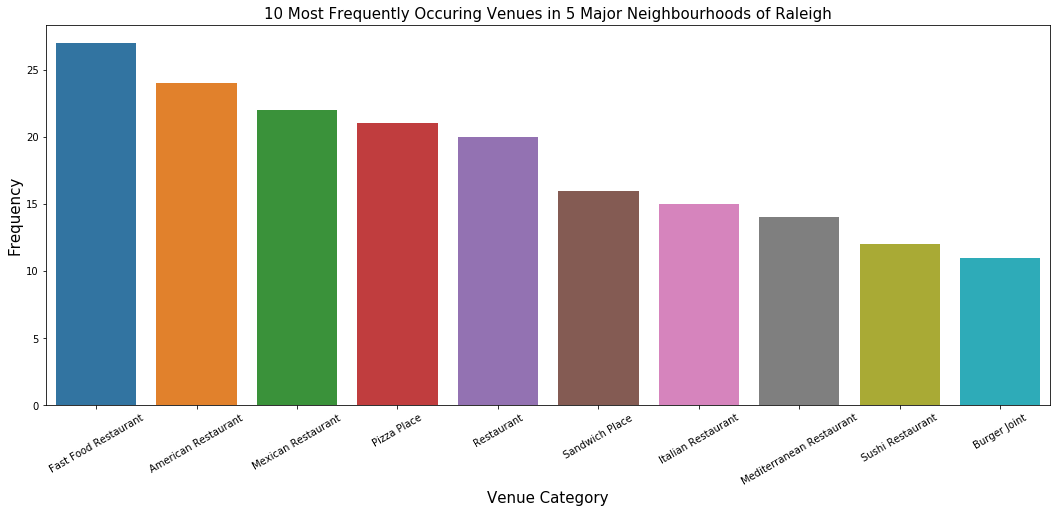

In [69]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="frequency", data=final_Ral_clusters_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in 5 Major Neighbourhoods of Raleigh', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

In [71]:
## Define a Function to select the top 10 rows (According to the Values) 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Neighbourhood_top10_venues_sorted = pd.DataFrame(columns=columns)
Neighbourhood_top10_venues_sorted['Neighbourhood'] = final_Ral_onehot_grouped['Neighbourhood']

for ind in np.arange(final_Ral_onehot_grouped.shape[0]):
    Neighbourhood_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(final_Ral_onehot_grouped.iloc[ind, :], num_top_venues)

    
Neighbourhood_top10_venues_sorted.index = np.arange(1, len(Neighbourhood_top10_venues_sorted)+1)
Neighbourhood_top10_venues_sorted.head(5)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"North Raleigh,Raleigh,nc",Mexican Restaurant,Sandwich Place,Fast Food Restaurant,American Restaurant,Pizza Place,Mediterranean Restaurant,Restaurant,Sushi Restaurant,Burger Joint,Italian Restaurant
2,"Southeast raleigh,Raleigh,nc",American Restaurant,Italian Restaurant,Asian Restaurant,Bakery,Sushi Restaurant,Fast Food Restaurant,Mexican Restaurant,Burger Joint,Café,Southern / Soul Food Restaurant
3,"Southwest raleigh,Raleigh,nc",American Restaurant,Mediterranean Restaurant,Breakfast Spot,Fast Food Restaurant,Café,Italian Restaurant,Sushi Restaurant,Mexican Restaurant,Sandwich Place,Deli / Bodega
4,"east raleigh,Raleigh,nc",Restaurant,Pizza Place,Fast Food Restaurant,Comfort Food Restaurant,Seafood Restaurant,Sandwich Place,Mexican Restaurant,Italian Restaurant,Hot Dog Joint,BBQ Joint


[59, 56, 54, 30]


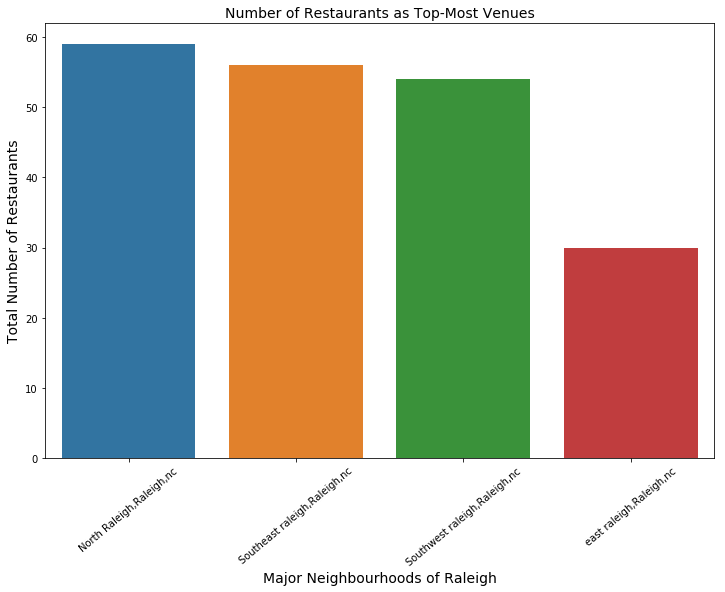

In [74]:
#try groupby to play with restaurant 
Raleigh_Neigh_Venues_restaurant = final_Ral.groupby(['Neighbourhood'])['Venue_Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Raleigh_Neigh_Venues_restaurant = Raleigh_Neigh_Venues_restaurant.to_frame().reset_index()
Raleigh_Neigh_Venues_restaurant.columns = ['Neighbourhood', 'Number of Restaurant']

Raleigh_Neigh_Venues_restaurant.index = np.arange(1, len(Raleigh_Neigh_Venues_restaurant)+1)

list_rest_no = Raleigh_Neigh_Venues_restaurant['Number of Restaurant'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='Neighbourhood', y='Number of Restaurant', data=Raleigh_Neigh_Venues_restaurant)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("Major Neighbourhoods of Raleigh", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

In [77]:
# create map
map_restaurants10 = folium.Map(location=[ral_lat, ral_long], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
Districts = ['Nagatacho', 'Nihonbashi', 'Shinjuku', 'Shinagawa', 'Shibuya']

# add markers to the map Neigh_Lat	Neigh_Lng
for lat, lon, poi, cluster in zip(Raleigh_Neigh_Venues_restaurant['Neigh_Lat'], 
                                  Raleigh_Neigh_Venues_restaurant['Neigh_Lng'], 
                                  Raleigh_Neigh_Venues_restaurant['Neighbourhood'], 
                                  Raleigh_Neigh_Venues_restaurant['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[Districts.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
#map_restaurants10


KeyError: 'Neigh_Lat'

In [78]:
Raleigh_Neigh_Venues_restaurant

,Neighbourhood,Number of Restaurant
1,"North Raleigh,Raleigh,nc",59
2,"Southeast raleigh,Raleigh,nc",56
3,"Southwest raleigh,Raleigh,nc",54
4,"east raleigh,Raleigh,nc",30
